In [1]:
%pylab inline
import numpy as np 
import pandas as pd 
from sklearn import tree
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import cluster

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('./data/wdbc.data', header=None) # cancer dataset

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.3801,0.1184,0.2776,122.80000,10.00000,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.7700,132.9000,1326.0000,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.2500,130.0000,1203.0000,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.3800,77.5800,386.1000,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.3400,135.1000,1297.0000,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancerous_data = df[df[1] == 'M']

In [13]:
cancerous_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.3801,0.1184,0.2776,122.80000,10.00000,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.7700,132.9000,1326.0000,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.2500,130.0000,1203.0000,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.3800,77.5800,386.1000,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.3400,135.1000,1297.0000,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
cancerous_data = cancerous_data.drop([0, 1], axis=1)

In [15]:
cancerous_data

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.3801,0.1184,0.2776,122.80000,10.00000,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.7700,132.9000,1326.0000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.2500,130.0000,1203.0000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.3800,77.5800,386.1000,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.3400,135.1000,1297.0000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.0900,143.0000,1347.0000,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.3900,142.0000,1479.0000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.2500,131.2000,1261.0000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.0800,108.3000,858.1000,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [16]:
standard_scaler = preprocessing.MinMaxScaler()
cancerous_data_scaled = standard_scaler.fit_transform(cancerous_data)

In [18]:
cancerous_data_scaled

array([[0.41025641, 0.        , 0.        , ..., 0.90229381, 0.59846245,
        0.41886396],
       [0.56060606, 0.25570677, 0.7048544 , ..., 0.59925194, 0.23358959,
        0.22287813],
       [0.50932401, 0.37612241, 0.68946012, ..., 0.81680089, 0.40370589,
        0.21343303],
       ...,
       [0.53496503, 0.61833778, 0.69583017, ..., 0.5107057 , 0.19850187,
        0.07431457],
       [0.32925408, 0.61245541, 0.5742684 , ..., 0.43055609, 0.12872068,
        0.1519087 ],
       [0.56235431, 0.65570815, 0.7430747 , ..., 0.90076715, 0.49714173,
        0.45231536]])

In [20]:
inertia = []
for k in range(2, 10 + 1):
    k_means = cluster.KMeans(k)
    k_means.fit(cancerous_data_scaled)
    inertia.append(k_means.inertia_)

/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

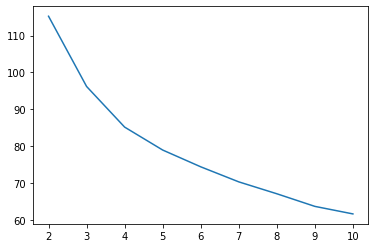

In [21]:
plt.plot(list(range(2, 10 + 1)), inertia)

In [22]:
k_means = cluster.KMeans(4)
k_means.fit(cancerous_data_scaled)

/Users/inzamamrahaman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
k_means.cluster_centers_

array([[2.64124294e-01, 3.63917804e-01, 5.33247264e-01, 3.01096193e-01,
        1.72911993e-04, 5.15407349e-03, 1.62505186e-01, 1.89064241e-01,
        2.64796258e-01, 1.85541102e-01, 7.95317094e-02, 2.27044839e-01,
        7.01477858e-02, 4.94846843e-02, 1.13159100e-01, 8.94281433e-02,
        1.24524386e-01, 1.74572096e-01, 1.33809300e-01, 1.38595699e-01,
        2.30435418e-01, 3.62573672e-01, 2.05920469e-01, 1.39273176e-01,
        3.53690899e-01, 2.07530603e-01, 2.50743398e-01, 4.13472380e-01,
        2.92228381e-01, 1.69401477e-01],
       [4.86993007e-01, 4.05086753e-01, 6.73227109e-01, 4.68164879e-01,
        2.08124926e-04, 8.46070823e-03, 3.29708555e-01, 4.05133875e-01,
        3.04472671e-01, 1.81064308e-01, 1.96373047e-01, 2.81142477e-01,
        1.74371791e-01, 1.42940371e-01, 1.48968603e-01, 1.60673502e-01,
        2.14110500e-01, 3.02005262e-01, 1.60111443e-01, 2.19586489e-01,
        4.68821839e-01, 3.89157286e-01, 4.32944010e-01, 3.31017557e-01,
        3.71017513e-01,

In [24]:
standard_scaler.inverse_transform(k_means.cluster_centers_)

array([[1.54823729e+01, 2.08972881e+01, 1.00572373e+02, 7.53235593e+02,
        9.49308475e-02, 9.73533898e-02, 8.94403390e-02, 5.45098305e-02,
        1.76662712e-01, 5.87694915e-02, 4.06881356e-01, 1.08998305e+00,
        2.78227119e+00, 4.01283051e+01, 5.88784746e-03, 1.97774068e-02,
        2.75455932e-02, 1.14107627e-02, 1.73915593e-02, 2.71591525e-03,
        1.81861017e+01, 2.85877966e+01, 1.19303390e+02, 1.02980339e+03,
        1.35748983e-01, 2.60228983e-01, 3.11336949e-01, 1.37323898e-01,
        3.04747458e-01, 8.08669492e-02],
       [1.93068000e+01, 2.20870667e+01, 1.26942000e+02, 1.17102800e+03,
        9.92524000e-02, 1.30267467e-01, 1.56793200e-01, 9.35946667e-02,
        1.83534667e-01, 5.85569333e-02, 7.19922667e-01, 1.26341467e+00,
        4.93408000e+00, 8.94925333e+01, 6.90709333e-03, 2.88240000e-02,
        3.94417333e-02, 1.59634400e-02, 1.92608000e-02, 3.66780000e-03,
        2.37166667e+01, 2.94616000e+01, 1.57012000e+02, 1.74805867e+03,
        1.38077333e-01,

In [25]:
random_point = np.random.random(size=(10, 30))

In [26]:
k_means.predict(random_point)

array([2, 3, 3, 3, 3, 3, 2, 3, 3, 3], dtype=int32)